In [1]:
# installing package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# importing data

# data import -- google colab
#from google.colab import drive
#drive.mount('/content/drive')
#file_path = '/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv'
#df = pd.read_csv(file_path)
# data import -- jupyter notebook
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## DATA COLUMNS
Gender\
Age\
Height\
Weight\
Family History With Overweight (FHWO)\
Consumption of High Caloric Food (FAVC)\
Consumption of Vegetables(FCVC)\
Number of Main Meals (NCP)\
Consumption of Food Between Meals (CAEC)\
Smoke\
Consumption of Water Daily (CH2O)\
Calories Consumption Monitoring (SCC)\
Physical Activity Frequency (FAF)\
Time Using Technology Devices (TUE)\
Consumption of Alcohol (CALC)\
Transportation Used (MTRANS)\
NObeyesdad (Obesity Level)


In [2]:
# data preprocessing
df = df.rename(columns={'family_history_with_overweight': 'FHWO', 'NObeyesdad' : 'Obesity Level',})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         2111 non-null   object 
 1   Age            2111 non-null   float64
 2   Height         2111 non-null   float64
 3   Weight         2111 non-null   float64
 4   FHWO           2111 non-null   object 
 5   FAVC           2111 non-null   object 
 6   FCVC           2111 non-null   float64
 7   NCP            2111 non-null   float64
 8   CAEC           2111 non-null   object 
 9   SMOKE          2111 non-null   object 
 10  CH2O           2111 non-null   float64
 11  SCC            2111 non-null   object 
 12  FAF            2111 non-null   float64
 13  TUE            2111 non-null   float64
 14  CALC           2111 non-null   object 
 15  MTRANS         2111 non-null   object 
 16  Obesity Level  2111 non-null   object 
dtypes: float64(8), object(9)
memory usage: 280.5+ KB


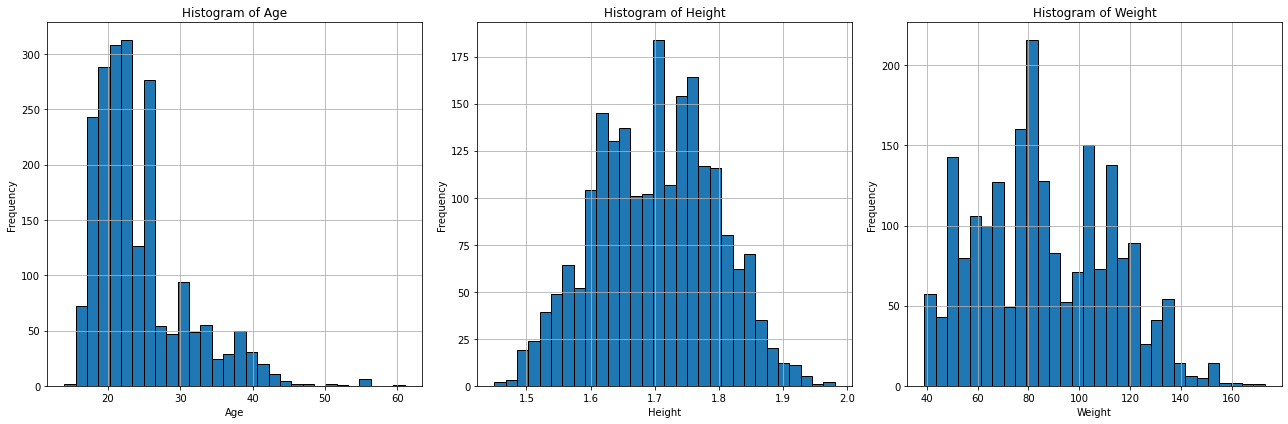

In [3]:
# histogram of age, height, weight (general)
histogram_columns = ["Age", "Height", "Weight"]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, column_name in enumerate(histogram_columns):
    axs[i].hist(df[column_name], bins=30, edgecolor='k')
    axs[i].set_xlabel(column_name)
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(f"Histogram of {column_name}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

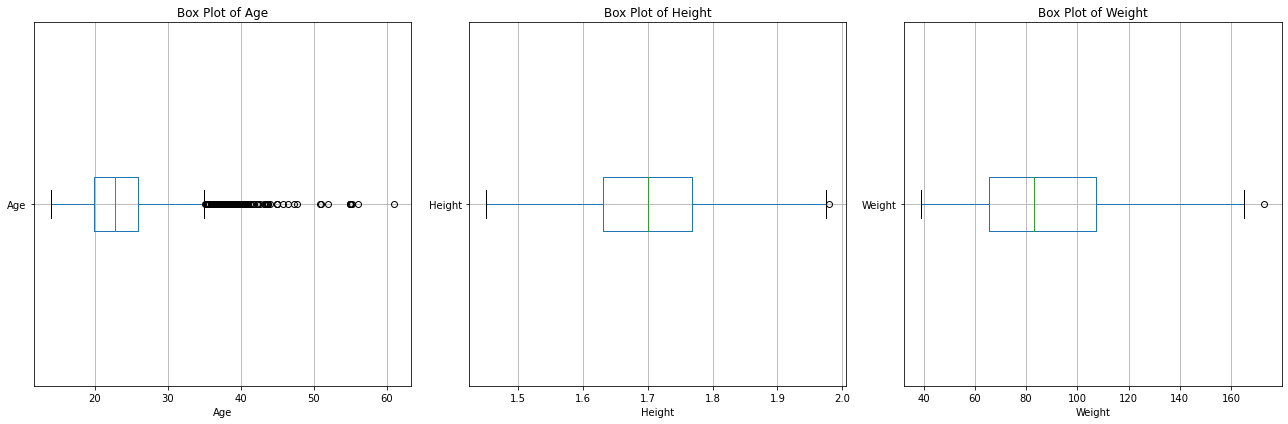

In [4]:
# box plots of Age, Height, Weight
boxplot_columns = ["Age", "Height", "Weight"]

fig, axs = plt.subplots(1, len(boxplot_columns), figsize=(18, 6))

for i, column_name in enumerate(boxplot_columns):
    df.boxplot(column=column_name, ax=axs[i], vert=False)
    axs[i].set_title(f"Box Plot of {column_name}")
    axs[i].set_xlabel(column_name)

plt.tight_layout()
plt.show()

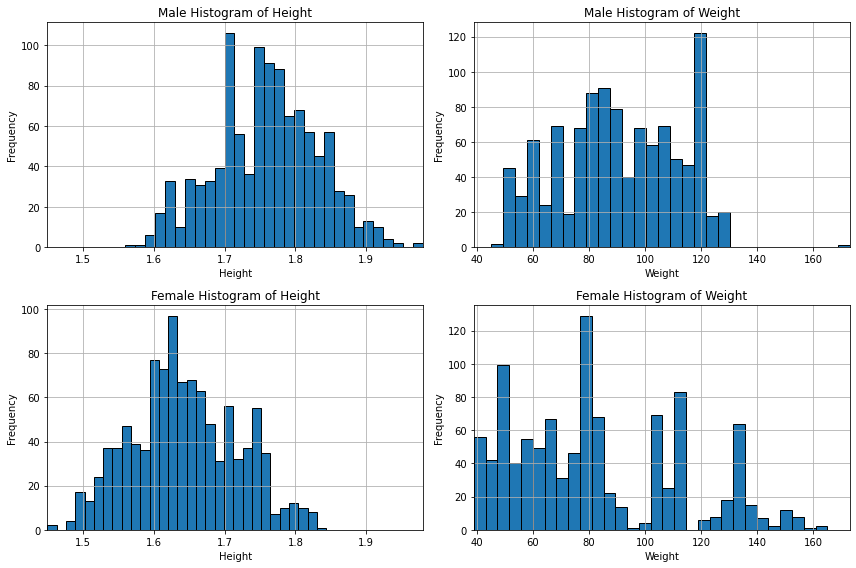

In [5]:
# histogram of height and weight by gender
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

histogram_columns = ["Height", "Weight"]

height_min = df['Height'].min()
height_max = df['Height'].max()
weight_min = df['Weight'].min()
weight_max = df['Weight'].max()

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, gender_data in enumerate([(male_data, 'Male'), (female_data, 'Female')]):
    for j, column_name in enumerate(histogram_columns):
        ax = axs[i, j]
        data, gender = gender_data
        ax.hist(data[column_name], bins=30, edgecolor='k')
        ax.set_xlabel(column_name)
        ax.set_ylabel("Frequency")
        ax.set_title(f"{gender} Histogram of {column_name}")
        ax.grid(True)

        if column_name == "Height":
            ax.set_xlim(height_min, height_max)
        elif column_name == "Weight":
            ax.set_xlim(weight_min, weight_max)

plt.tight_layout()
plt.show()

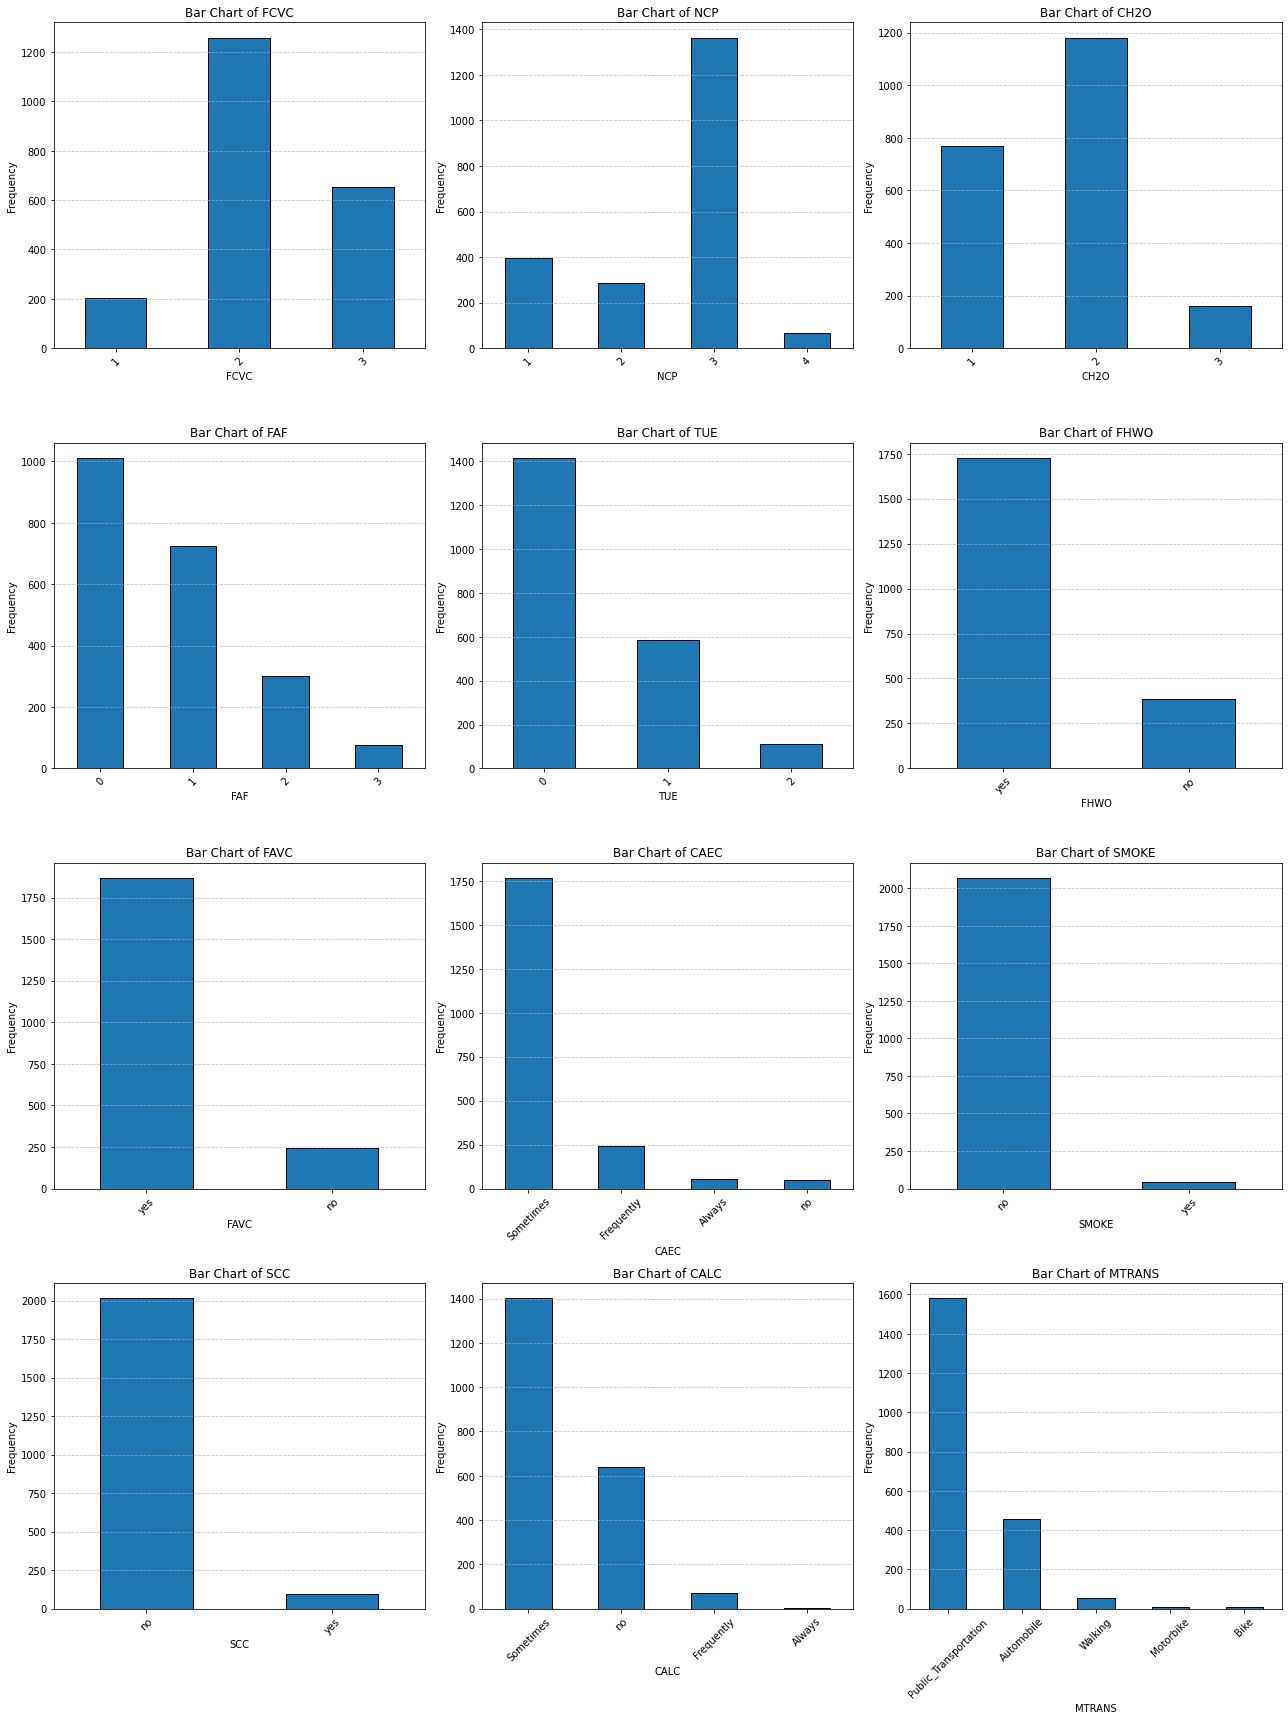

In [6]:
# barplot of FCVC, NCP, CH2O, FAF, TUE, FHWO, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS
numeric_columns_to_convert = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]
df[numeric_columns_to_convert] = df[numeric_columns_to_convert].astype(int)
columns_to_plot = numeric_columns_to_convert + ["FHWO", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]

figsize = (6, 6)

num_plots = len(columns_to_plot)
num_rows = (num_plots - 1) // 3 + 1
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 24))

axs = axs.ravel()

for i, column_name in enumerate(columns_to_plot):
    if column_name in numeric_columns_to_convert:
        df[column_name].value_counts().sort_index().plot(kind='bar', ax=axs[i], edgecolor='k')
    else:
        counts = df[column_name].value_counts()
        counts.plot(kind='bar', ax=axs[i], edgecolor='k')

    axs[i].set_xlabel(column_name)
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(f"Bar Chart of {column_name}")
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)
    axs[i].tick_params(axis='x', rotation=45)

for i in range(num_plots, num_rows * num_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [7]:
# Transfer categorical data into numerical data
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
for i in cat_cols:
    print("Column Name: " + i)
    col_val = sorted(list(set(df[i].tolist())))
    print("Column Value: " + str(col_val))
    replace_num = []
    for j in range(len(col_val)):
        replace_num.append(j)
    df[i].replace(col_val,replace_num, inplace=True)
    new_val = list(set(df[i].tolist()))
    print("Replaced Value: " + str(new_val))

Column Name: MTRANS
Column Value: ['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']
Replaced Value: [0, 1, 2, 3, 4]
Column Name: Obesity Level
Column Value: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
Replaced Value: [0, 1, 2, 3, 4, 5, 6]
Column Name: CALC
Column Value: ['Always', 'Frequently', 'Sometimes', 'no']
Replaced Value: [0, 1, 2, 3]
Column Name: Gender
Column Value: ['Female', 'Male']
Replaced Value: [0, 1]
Column Name: CAEC
Column Value: ['Always', 'Frequently', 'Sometimes', 'no']
Replaced Value: [0, 1, 2, 3]
Column Name: SCC
Column Value: ['no', 'yes']
Replaced Value: [0, 1]
Column Name: FAVC
Column Value: ['no', 'yes']
Replaced Value: [0, 1]
Column Name: FHWO
Column Value: ['no', 'yes']
Replaced Value: [0, 1]
Column Name: SMOKE
Column Value: ['no', 'yes']
Replaced Value: [0, 1]


In [8]:
# percentage of the max categories
categorical_columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE", "FHWO", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]

max_frequency_info = []
for column in categorical_columns:
    max_category = df[column].value_counts().idxmax()
    max_frequency = df[column].value_counts().max()
    max_percentage = (max_frequency / len(df)) * 100

    max_frequency_info.append({
        "Column": column,
        "Max Category": max_category,
        "Max Frequency": max_frequency,
        "Max Percentage": max_percentage
    })
max_frequency_df = pd.DataFrame(max_frequency_info)

print("Maximum Frequency Information for Categorical Columns:")
print(max_frequency_df)

Maximum Frequency Information for Categorical Columns:
    Column  Max Category  Max Frequency  Max Percentage
0     FCVC             2           1257       59.545239
1      NCP             3           1362       64.519185
2     CH2O             2           1180       55.897679
3      FAF             0           1011       47.891994
4      TUE             0           1415       67.029844
5     FHWO             1           1726       81.762198
6     FAVC             1           1866       88.394126
7     CAEC             2           1765       83.609664
8    SMOKE             0           2067       97.915680
9      SCC             0           2015       95.452392
10    CALC             2           1401       66.366651
11  MTRANS             3           1580       74.846045


In [9]:
df.describe()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity Level
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.213169,2.523449,1.859308,0.020843,1.712459,0.045476,0.734723,0.381336,2.268593,2.365230,3.015632
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.599397,0.830288,0.468543,0.142893,0.598760,0.208395,0.832812,0.582536,0.515498,1.261423,1.952090
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,1.000000,3.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


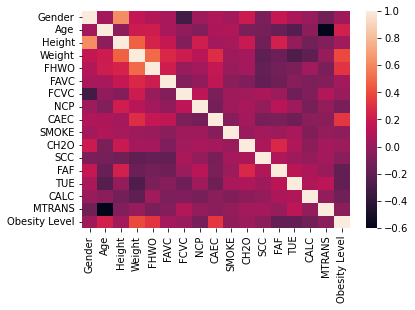

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity Level
Gender,1.000000,0.048394,0.618466,0.161668,0.102512,0.064934,-0.317272,0.023921,0.091543,0.044698,0.194832,-0.102633,0.174468,0.071148,0.007616,-0.137537,0.024908
Age,0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,-0.016069,-0.071102,0.083739,0.091987,-0.098992,-0.116283,-0.170416,-0.241917,-0.044487,-0.601945,0.236170
Height,0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.070032,0.214633,0.048818,0.055499,0.191061,-0.133753,0.234248,-0.006181,-0.129732,-0.073609,0.038986
Weight,0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.201087,0.126058,0.287493,0.025746,0.052705,-0.201906,-0.158726,-0.274960,-0.206677,0.004610,0.387643
FHWO,0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.008332,0.052504,0.169787,0.017385,0.053889,-0.185422,-0.128375,-0.097283,0.036676,-0.101540,0.313667
FAVC,0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.073482,-0.019162,0.150068,-0.050660,-0.082638,-0.190658,-0.156302,-0.054783,-0.089520,-0.069800,0.044582
FCVC,-0.317272,-0.016069,-0.070032,0.201087,0.008332,-0.073482,1.000000,0.138510,-0.100727,0.025567,0.037495,0.070328,0.019344,-0.150120,-0.085690,0.105084,0.014163
NCP,0.023921,-0.071102,0.214633,0.126058,0.052504,-0.019162,0.138510,1.000000,-0.122478,0.035825,0.067431,-0.006166,0.126888,0.028048,-0.116039,-0.012480,-0.111780
CAEC,0.091543,0.083739,0.048818,0.287493,0.169787,0.150068,-0.100727,-0.122478,1.000000,-0.055282,0.048315,-0.109179,-0.098121,-0.157565,-0.047540,-0.048535,0.327295
SMOKE,0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.025567,0.035825,-0.055282,1.000000,0.014689,0.047731,0.022590,0.063889,-0.082471,-0.010702,-0.023256


In [10]:
# correlation plot
dataplot=sb.heatmap(df.corr())

# displaying heatmap
plt.show()

# displaying the correlation between columns
df.corr()

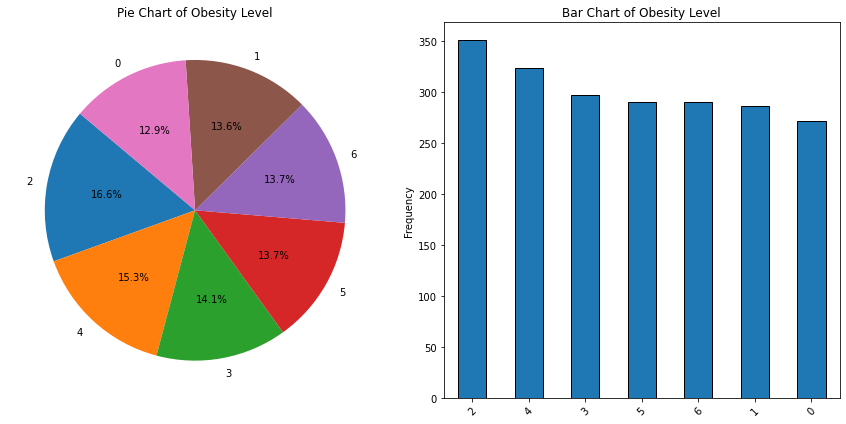

In [11]:
# pie chart and bar chart of obesity level
obesity_level_counts = df["Obesity Level"].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(obesity_level_counts, labels=obesity_level_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title("Pie Chart of Obesity Level")

obesity_level_counts.plot(kind='bar', edgecolor='k', ax=axs[1])
axs[1].set_ylabel("Frequency")
axs[1].set_title("Bar Chart of Obesity Level")
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

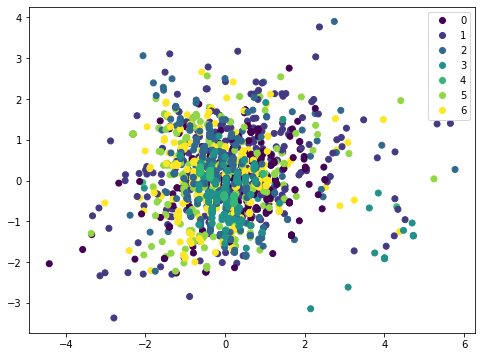

In [12]:
# PCA
# the column FHMO and CAEC has the highest
# the highest correlation coefficient with obesity level
X = df.drop(['Obesity Level', 'Weight', 'Height'], axis =1)
y = df['Obesity Level']
target_names = list(set(df['Obesity Level'].tolist()))
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plt.figure(figsize=(8,6))
plot = plt.scatter(Xt[:,4], Xt[:,8], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=target_names)
plt.show()

In [13]:
# Outlier Dection with IsolationForest
df1 = df.drop(['Obesity Level', 'Weight', 'Height'], axis =1)
n_sample = len(df1)
model=IsolationForest(n_estimators=100, max_samples= n_sample, contamination=float(0.01), max_features= len(df1.columns))
features_name = list(df1.columns.values)
model.fit(df1[features_name])
df1['scores']= model.decision_function(df1[features_name])
df1['anomaly']= model.predict(df1[features_name])
# A negative score value and a -1 for the value of anomaly columns indicate the presence of anomaly.
# A value of 1 for the anomaly represents the normal data.
anomaly = df1.loc[df1['anomaly'] == -1]
anomaly_index = list(anomaly.index)
import os
import shutil
from tabulate import tabulate
terminal_width = 60
shutil.get_terminal_size = lambda: os.terminal_size((terminal_width, 20))
headers = list(anomaly.columns.values)
table = tabulate(anomaly, headers, tablefmt="grid")
print(table)
print("The number of Outliers (Isolation Forest): " + str(len(anomaly)))

/Users/smy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


+-----+----------+-------+--------+--------+--------+-------+--------+---------+--------+-------+-------+-------+--------+----------+--------------+-----------+
|     |   Gender |   Age |   FHWO |   FAVC |   FCVC |   NCP |   CAEC |   SMOKE |   CH2O |   SCC |   FAF |   TUE |   CALC |   MTRANS |       scores |   anomaly |
+=====+==========+=======+========+========+========+=======+========+=========+========+=======+=======+=======+========+==========+==============+===========+
|   1 |        0 |    21 |      1 |      0 |      3 |     3 |      2 |       1 |      3 |     1 |     3 |     0 |      2 |        3 | -0.000238354 |        -1 |
+-----+----------+-------+--------+--------+--------+-------+--------+---------+--------+-------+-------+-------+--------+----------+--------------+-----------+
|  18 |        0 |    30 |      1 |      1 |      3 |     4 |      1 |       1 |      1 |     0 |     0 |     0 |      3 |        0 | -0.00704565  |        -1 |
+-----+----------+-------+--------